In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data=pd.read_csv('C:/Users/Mohan/Downloads/fake_job_posting.csv')
data.head()

,Unnamed: 0,job_id,title,location,country,state,city,department,salary_range,company_profile,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",US,NY,New York,Marketing,NaN,"We're Food52, and we've created a groundbreaki...",...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",NZ,,Auckland,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",US,IA,Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",US,DC,Washington,Sales,NaN,Our passion for improving quality of life thro...,...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",US,FL,Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Descriptive Statistics

In [3]:
data.shape

(17880, 22)

In [4]:
data.drop(['Unnamed: 0','job_id'],axis=1,inplace=True)

In [5]:
data.columns

Index(['title', 'location', 'country', 'state', 'city', 'department',
       'salary_range', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [6]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   country              17534 non-null  object
 3   state                17440 non-null  object
 4   city                 17440 non-null  object
 5   department           6333 non-null   object
 6   salary_range         2868 non-null   object
 7   company_profile      14572 non-null  object
 8   description          17879 non-null  object
 9   requirements         15185 non-null  object
 10  benefits             10670 non-null  object
 11  telecommuting        17880 non-null  int64 
 12  has_company_logo     17880 non-null  int64 
 13  has_questions        17880 non-null  int64 
 14  employment_type      14409 non-null  object
 15  required_experience  10830 non-null  object
 16  requ

In [8]:
data.dtypes

title                  object
location               object
country                object
state                  object
city                   object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [9]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [10]:
data.nunique()

title                  11231
location                3105
country                   90
state                    325
city                    2335
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [11]:
#Checking categorical columns
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['title', 'location', 'country', 'state', 'city', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [12]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(data[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'title': 11231},
 {'location': 3106},
 {'country': 91},
 {'state': 326},
 {'city': 2336},
 {'department': 1338},
 {'salary_range': 875},
 {'company_profile': 1710},
 {'description': 14802},
 {'requirements': 11969},
 {'benefits': 6206},
 {'employment_type': 6},
 {'required_experience': 8},
 {'required_education': 14},
 {'industry': 132},
 {'function': 38}]

In [13]:
#Checking those unique values
unique_categories_list = [{col:data[col].value_counts()} for col in categorical_columns]        

In [14]:
#Checking numerical  columns
numerical_columns = [col for col in data.columns if data.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


### Check for missing values, outliers and duplicated values

In [15]:
#Check for number of null values
data.isna().sum()

title                      0
location                 346
country                  346
state                    440
city                     440
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
#dropping unneccessary columns
data.drop(["location","salary_range",'department','state'],axis=1,inplace=True)

In [17]:
#relacing missing values
data['required_experience']=data['required_experience'].replace(np.nan,"Not Applicable")

In [18]:
data['required_education']=data['required_education'].replace(np.nan,"Unspecified")

In [19]:
text_data=data.select_dtypes(include="object")
text_col=text_data.columns
text_col

Index(['title', 'country', 'city', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'],
      dtype='object')

In [20]:
#As text_col contains missing data replace them with empty string
data[text_col]=data[text_col].replace(np.nan,"Not Specified")

In [21]:
data.isna().sum()

title                  0
country                0
city                   0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<AxesSubplot:>

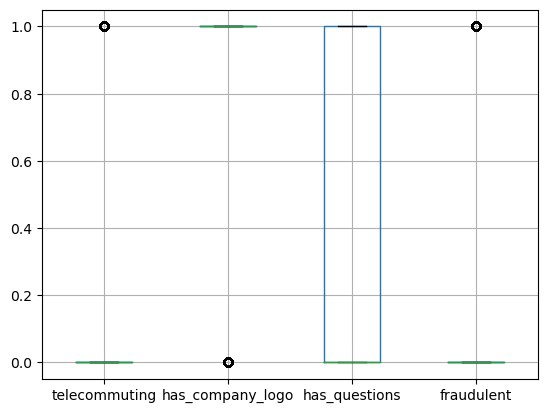

In [22]:
#Outlier detection
data.boxplot()

In [23]:
#Check if any duplicate rows in dataset
data.duplicated().sum()

339

In [24]:
data.loc[data.duplicated(),:]

,title,country,city,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
146,Customer Service Associate,US,Dallas,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 6 months customer ser...,Not Specified,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
402,Inside Sales Professional-Omaha,US,Omaha,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,Not Applicable,Unspecified,Building Materials,Sales,0
495,Customer Service Associate - Part Time,US,Warrenville,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Specified,0,1,0,Full-time,Entry level,High School or equivalent,Insurance,Administrative,0
701,English Teacher Abroad,US,Mansfield,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,Not Applicable,Bachelor's Degree,Education Management,Not Specified,0
1019,Texas Captioning Assistant,US,Lubbock,"Why CSD?CSD is not only a great place to work,...",Captioning Assistants provide quick and accura...,A minimum of a High School Diploma or equivale...,CSD offers a competitive benefits package for ...,0,1,1,Not Specified,Entry level,High School or equivalent,Telecommunications,Customer Service,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,Home Based Payroll Typist/Data Entry Clerks Po...,US,Aberdeen,Not Specified,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
17742,Data Entry Admin/Clerical Positions - Work Fro...,US,Omaha,Not Specified,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,Not Specified,Not Specified,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
17761,Payroll Data Coordinator Positions - Earn $100...,US,Aberdeen,Not Specified,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
17791,Data Entry Admin/Clerical Positions - Work Fro...,US,Omaha,Not Specified,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,Not Specified,Not Specified,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1


In [25]:
#drop the duplicate values
data.drop_duplicates(inplace=True)

In [26]:
data.head(2)

,title,country,city,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,New York,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,0,Other,Internship,Unspecified,Not Specified,Marketing,0
1,Customer Service - Cloud Video Production,NZ,Auckland,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0


In [27]:
type(data.title[0])

str

In [28]:
data['title'].value_counts()

English Teacher Abroad                                         297
Customer Service Associate                                     141
Graduates: English Teacher Abroad (Conversational)             135
English Teacher Abroad                                          94
Software Engineer                                               86
                                                              ... 
Director of Program Management - Six Sigma Lean - PA             1
DP - Director of Photography                                     1
Senior Mechanical Design Engineer                                1
.Net Production Support                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [29]:
data.title = data.title.str.strip()

In [30]:
data['title'].value_counts()

English Teacher Abroad                                         391
Customer Service Associate                                     191
Graduates: English Teacher Abroad (Conversational)             135
Software Engineer                                               90
Customer Service Associate - Part Time                          85
                                                              ... 
Accounting Professional                                          1
IHF Co-Director                                                  1
Online advertising implementation specialist                     1
Equity Derivatives / Junior Sales position                       1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [31]:
data['telecommuting'].value_counts()

0    16792
1      749
Name: telecommuting, dtype: int64

In [32]:
data['has_company_logo'].value_counts()

1    13935
0     3606
Name: has_company_logo, dtype: int64

In [33]:
data['has_questions'].value_counts()

0    8912
1    8629
Name: has_questions, dtype: int64

In [34]:
data['employment_type'].value_counts()

Full-time        11402
Not Specified     3413
Contract          1492
Part-time          772
Temporary          237
Other              225
Name: employment_type, dtype: int64

In [35]:
data['required_experience'].value_counts()

Not Applicable      8002
Mid-Senior level    3761
Entry level         2621
Associate           2263
Director             382
Internship           372
Executive            140
Name: required_experience, dtype: int64

In [36]:
data['required_education'].value_counts()

Unspecified                          9352
Bachelor's Degree                    5072
High School or equivalent            1985
Master's Degree                       416
Associate Degree                      263
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [37]:
data['industry'].value_counts()

Not Specified                          4822
Information Technology and Services    1707
Computer Software                      1360
Internet                               1054
Marketing and Advertising               817
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

In [38]:
data['function'].value_counts()

Not Specified             6335
Information Technology    1730
Sales                     1440
Engineering               1339
Customer Service          1176
Marketing                  814
Administrative             612
Design                     336
Health Care Provider       326
Other                      325
Education                  315
Management                 306
Business Development       226
Accounting/Auditing        210
Human Resources            199
Project Management         183
Finance                    165
Consulting                 138
Writing/Editing            131
Art/Creative               131
Production                 115
Product Management         113
Quality Assurance          110
Advertising                 89
Business Analyst            83
Data Analyst                82
Public Relations            76
Manufacturing               73
General Business            68
Research                    50
Strategy/Planning           46
Legal                       44
Training

In [39]:
data['fraudulent'].value_counts()   # dataset is unbalanced

0    16701
1      840
Name: fraudulent, dtype: int64

### Exploratory Data Analysis

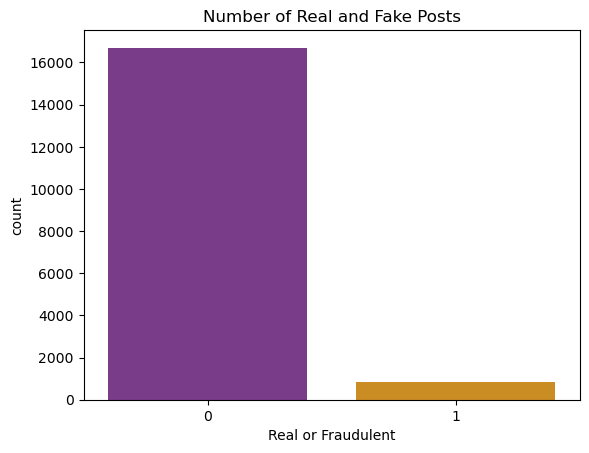

In [40]:
sns.countplot(x='fraudulent',data=data, palette='CMRmap')
plt.title("Number of Real and Fake Posts")
plt.xlabel('Real or Fraudulent')
plt.show() 

- Dataset is highly unbalanced

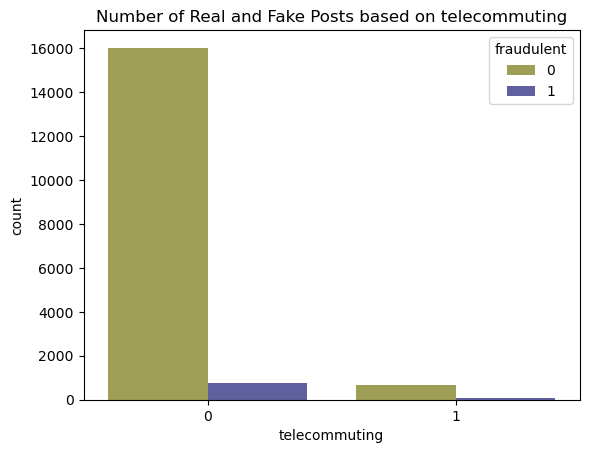

In [41]:
sns.countplot(x="telecommuting",hue="fraudulent",data=data, palette='gist_stern_r')
plt.title("Number of Real and Fake Posts based on telecommuting")
plt.show()

- When there is no telecommunication chance of job postings to be fake is greater.

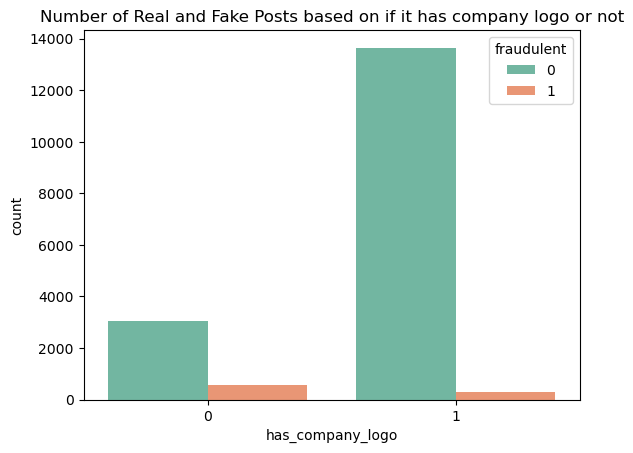

In [42]:
plt.title("Number of Real and Fake Posts based on if it has company logo or not")
sns.countplot(x="has_company_logo",hue="fraudulent",data=data, palette='Set2' )
plt.show()

- If company logo is present often it is a real job and chances for the postings to be fake is higher if logo is absent.

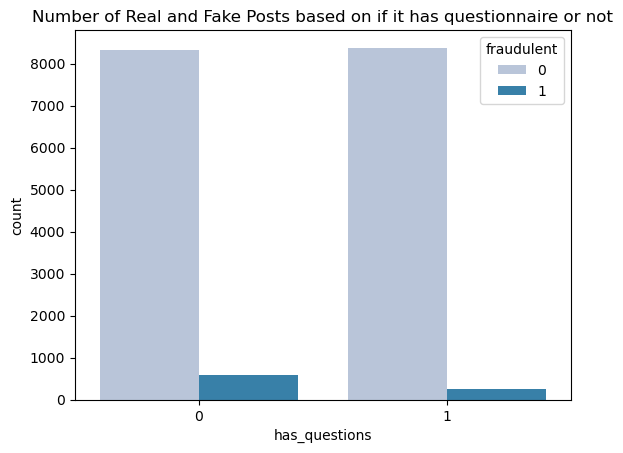

In [43]:
plt.title("Number of Real and Fake Posts based on if it has questionnaire or not")
sns.countplot(x="has_questions",hue="fraudulent",data=data, palette= 'PuBu')
plt.show()

- If job postings has no questionnaire present, its more likely to be fake.

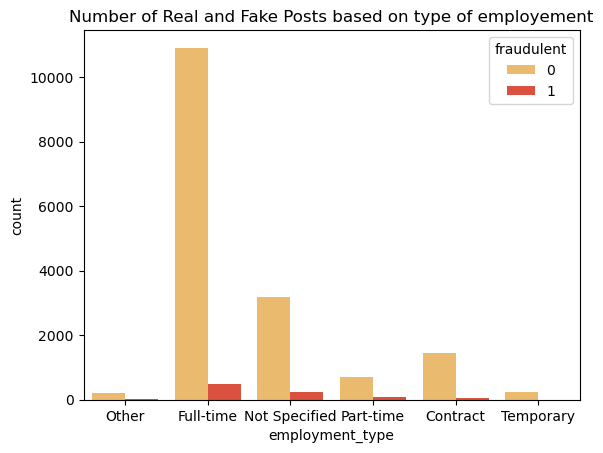

In [44]:
plt.title("Number of Real and Fake Posts based on type of employement")
sns.countplot(x="employment_type",hue="fraudulent",data=data, palette='YlOrRd')
plt.show()

- Comparatively full-time type of employment has higher no. of fake jobs.

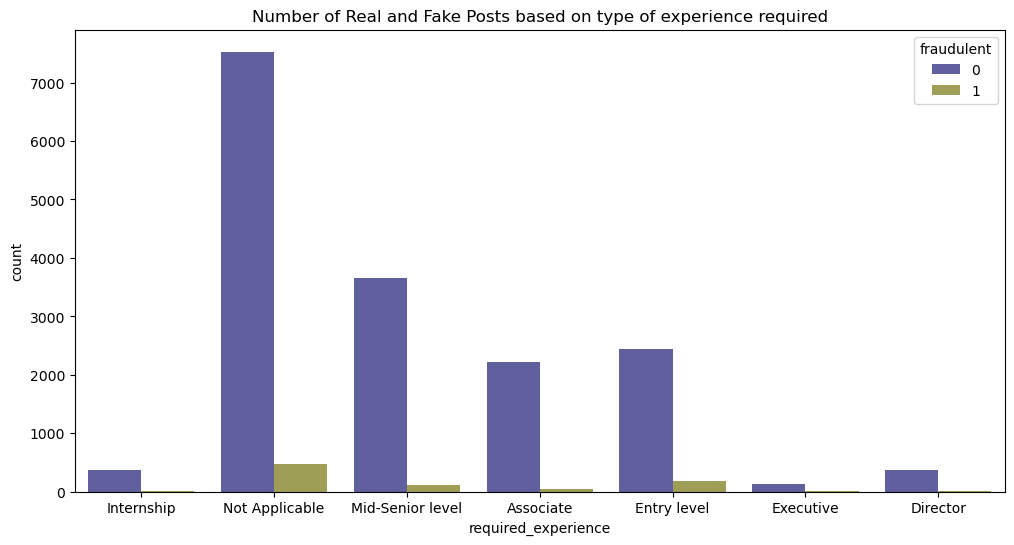

In [45]:
plt.figure(figsize=(12,6))
plt.title("Number of Real and Fake Posts based on type of experience required")
sns.countplot(x="required_experience",hue="fraudulent",data=data, palette='gist_stern')
plt.show()

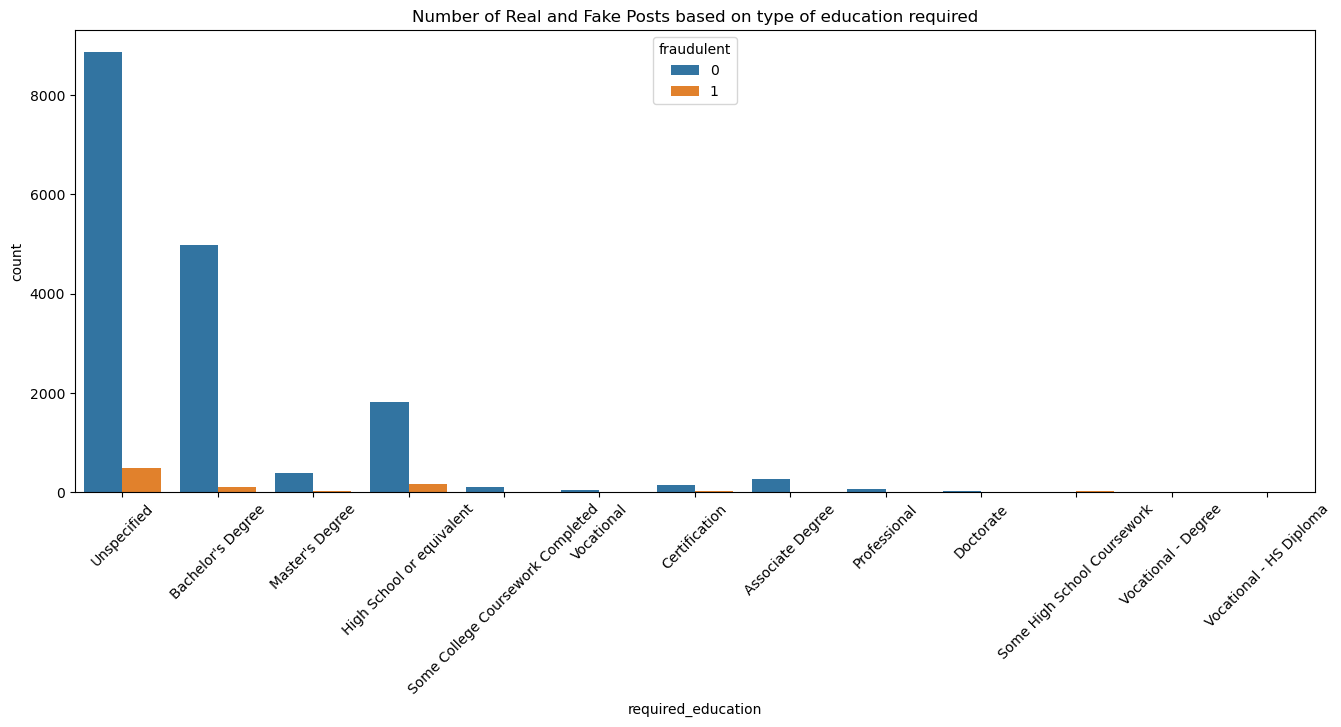

In [46]:
plt.figure(figsize=(16,6))
plt.title("Number of Real and Fake Posts based on type of education required")
sns.countplot(x="required_education",hue="fraudulent",data=data)
plt.xticks(rotation=45)
plt.show()

- If experience required or education required is not specified chance for job posting to be fake is greater.

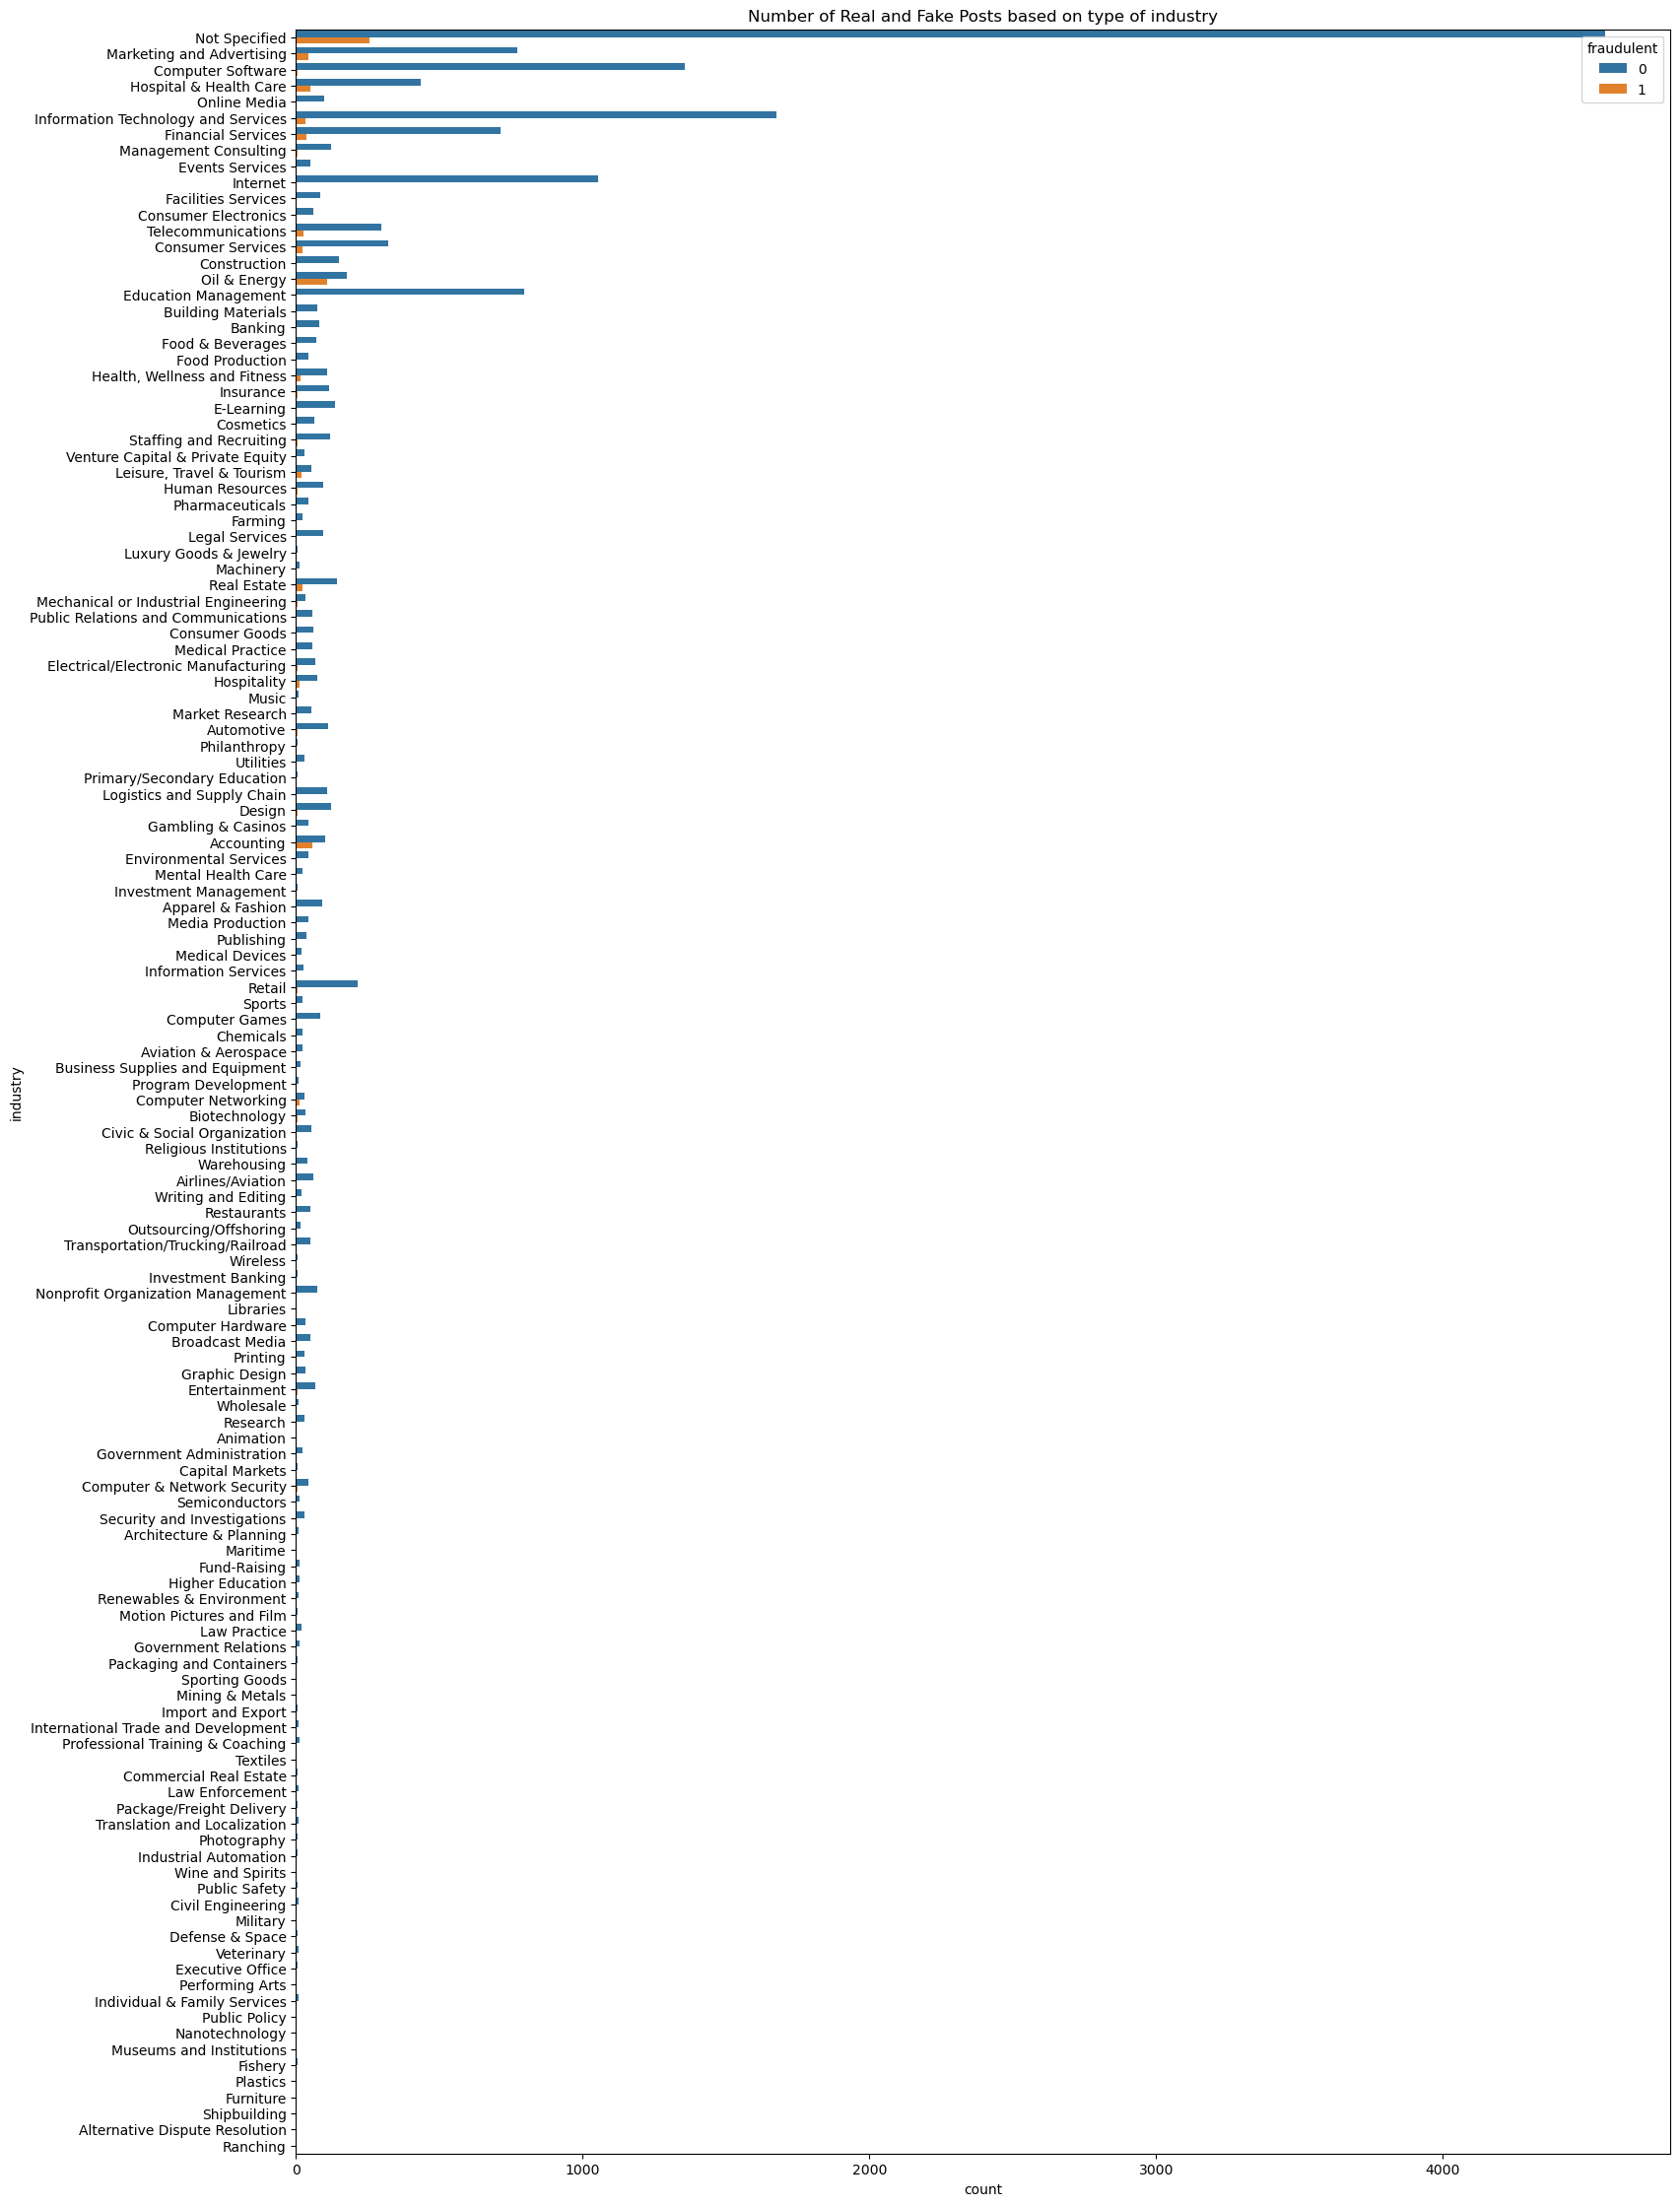

In [47]:
plt.figure(figsize=(18,28))
plt.title("Number of Real and Fake Posts based on type of industry")
sns.countplot(y='industry',hue="fraudulent",data=data)
plt.show()

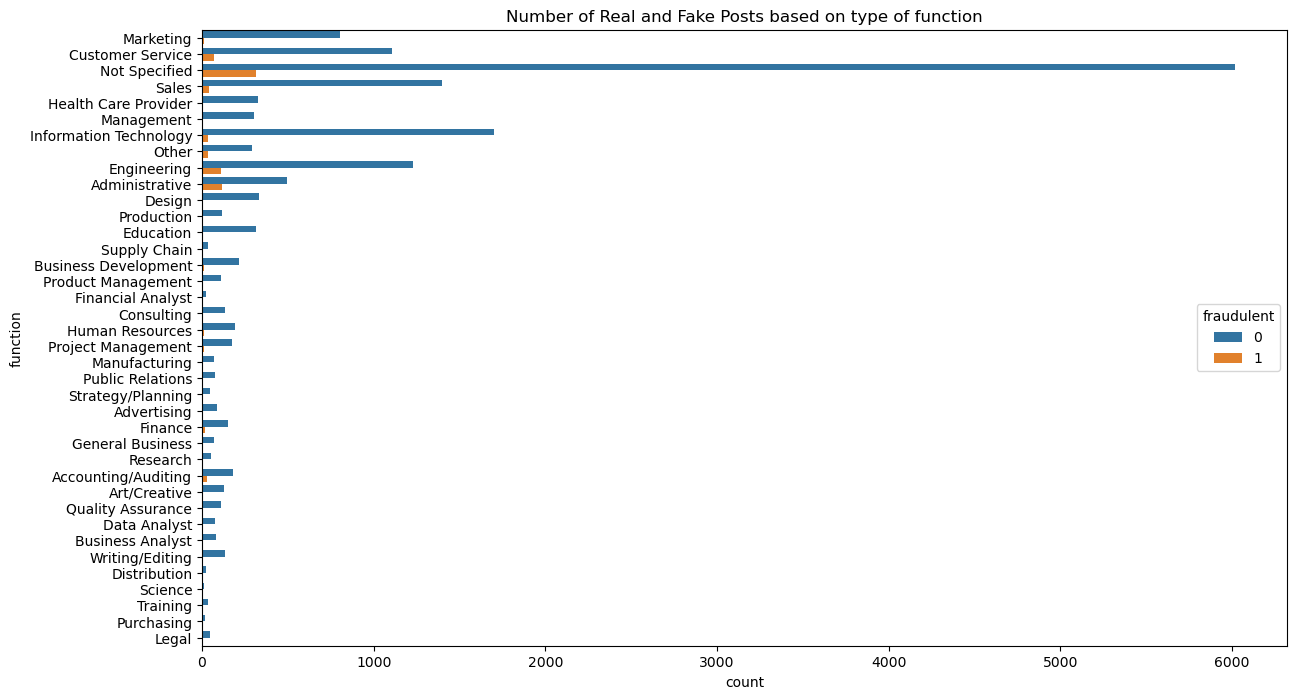

In [48]:
plt.figure(figsize=(14,8))
plt.title("Number of Real and Fake Posts based on type of function")
sns.countplot(y='function',hue="fraudulent",data=data)
plt.show()

- If type of function or type of industry is not specified chance for job posting to be fake is greater.

In [49]:
title = data.title.value_counts()[:5]

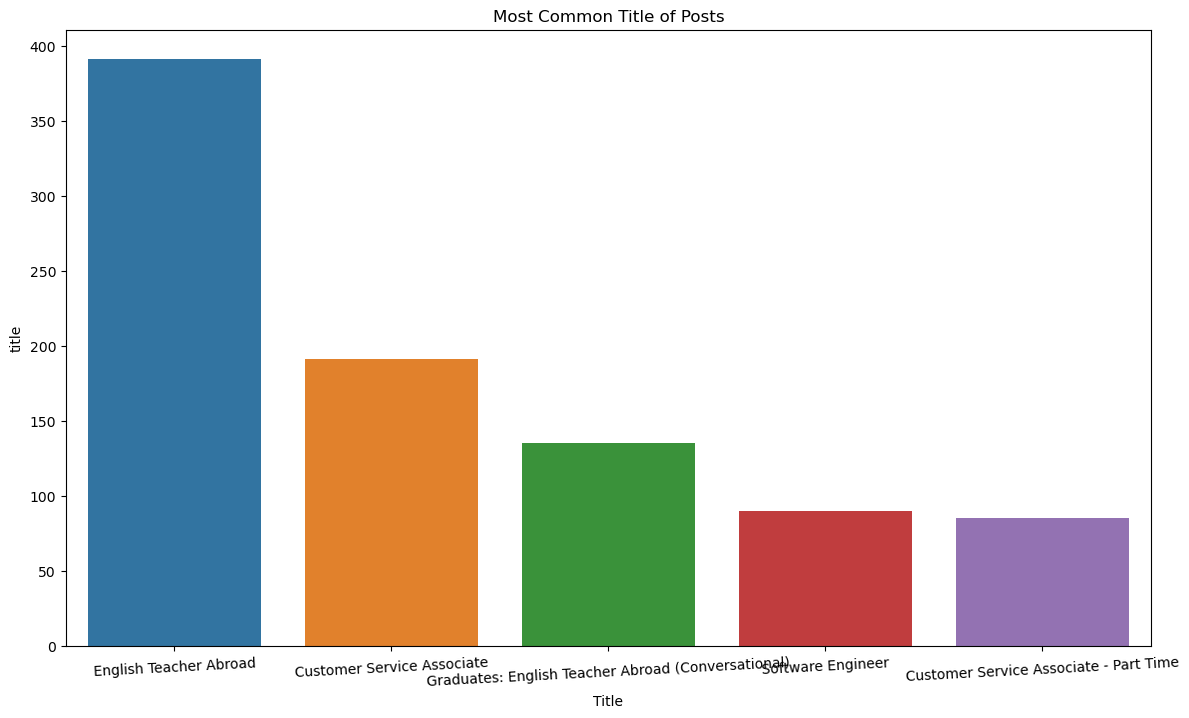

In [50]:
plt.figure(figsize=(14,8))
sns.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts")
plt.xlabel("Title")
plt.xticks(rotation=3)
plt.show()

- Most common title of posts found in job postings is English Teacher Abroad.

In [51]:
# Creating new feature "text", containing all the information provided in job ads
data['text']=data['title']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

In [52]:
data["text"].iloc[0]

"Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cu

In [53]:
data['text_len']=data['text'].str.len()

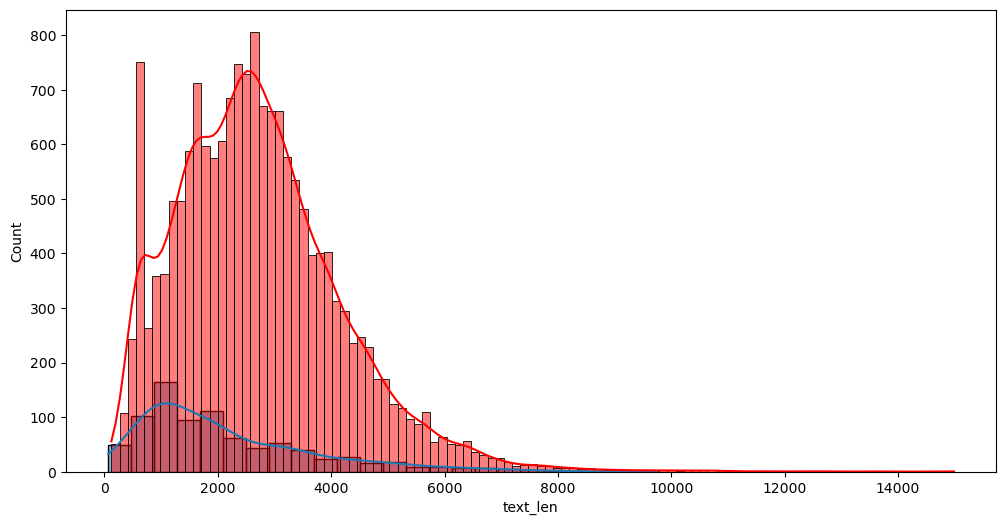

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(x=data[data["fraudulent"]==1]["text_len"],kde=True)
sns.histplot(x=data[data["fraudulent"]==0]["text_len"],kde=True,color="red")
plt.show()

- Fake job postings have less information than real job postings

In [55]:
corr=data.corr()

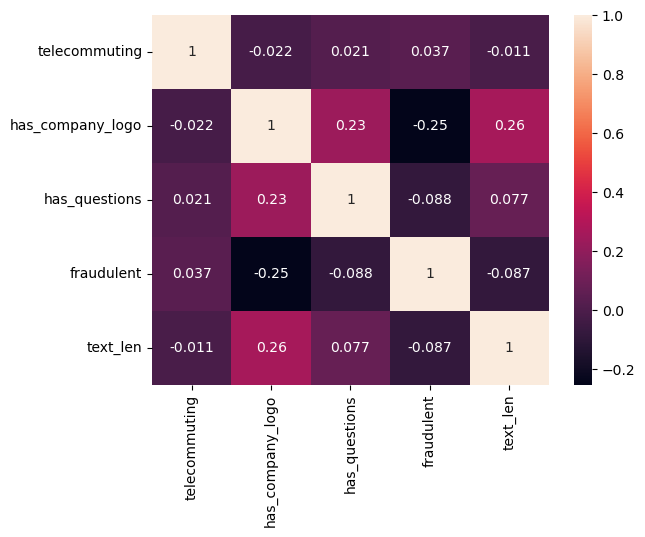

In [56]:
sns.heatmap(corr,annot=True)
plt.show()

- We see has_company_logo is slightly negatively correlated with fradulent (our target).

## Key findings from EDA
- Dataset is highly unbalanced with 16702 (95%of jobs) being real and only 840 (5%of jobs) being fake.
- When there is no telecommunication chance of fake job postings is greater.
- has_company_logo is negatively correlated with dependent feature. i.e, if company logo is present often
  it is a real job post. 
- If job postings has no questionnaire present, its more likely to be fake.
- Comparatively full-time type of employment has higher no. of fake jobs.
- If experience required or education required and type of function or type of industry is not specified chance for job posting to be fake is greater.
- Most common title of posts found in job postings is English Teacher Abroad.
- Fake job postings has less information than real job postings.

#### For this project we splitted  the dataset in two ways : 
- Dataset which takes up only the numerical columns or binary features and categorical columns. 
- Dataset that would consider textual features along with other features.


The main goal to convert these attributes into two forms is to classify fraudulent job advertisements without doing any text processing and natural language processing. In this work, we have used only those categorical attributes and binary features dropping newly added feature ‘text’.



In [57]:
data.drop(['title','company_profile','description','requirements','benefits'],axis=1,inplace=True)

In [58]:
data.shape 

(17541, 13)

In [59]:
data.columns

Index(['country', 'city', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'text', 'text_len'],
      dtype='object')

In [61]:
data.sample(10)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
4872,0,1,1,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,0
16723,0,1,1,Full-time,Associate,Bachelor's Degree,Writing and Editing,Writing/Editing,0
3376,1,0,0,Full-time,Associate,Bachelor's Degree,Internet,Marketing,0
479,0,1,0,Full-time,Entry level,High School or equivalent,Financial Services,Administrative,0
6791,0,1,1,Full-time,Associate,Bachelor's Degree,Financial Services,Accounting/Auditing,0
3137,0,1,1,Full-time,Not Applicable,Unspecified,Retail,Sales,0
1033,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,0
6398,0,1,1,Part-time,Entry level,High School or equivalent,Mental Health Care,Health Care Provider,0
4095,0,1,1,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,0
963,0,1,1,Full-time,Associate,Unspecified,Accounting,Accounting/Auditing,0


In [60]:
data.drop(['text','city','country','text_len'],axis=1,inplace=True)

In [62]:
data.shape

(17541, 9)

In [63]:
data.nunique()

telecommuting            2
has_company_logo         2
has_questions            2
employment_type          6
required_experience      7
required_education      13
industry               132
function                38
fraudulent               2
dtype: int64

#### Taking only top most values for industry and function, grouping other values into new category 'Others'

In [64]:
data['function'].value_counts()

Not Specified             6335
Information Technology    1730
Sales                     1440
Engineering               1339
Customer Service          1176
Marketing                  814
Administrative             612
Design                     336
Health Care Provider       326
Other                      325
Education                  315
Management                 306
Business Development       226
Accounting/Auditing        210
Human Resources            199
Project Management         183
Finance                    165
Consulting                 138
Writing/Editing            131
Art/Creative               131
Production                 115
Product Management         113
Quality Assurance          110
Advertising                 89
Business Analyst            83
Data Analyst                82
Public Relations            76
Manufacturing               73
General Business            68
Research                    50
Strategy/Planning           46
Legal                       44
Training

In [65]:
#Setting threshold to 100
counts=data['function'].value_counts()
threshold=100
repl = counts[counts<=threshold].index

In [66]:
repl

Index(['Advertising', 'Business Analyst', 'Data Analyst', 'Public Relations',
       'Manufacturing', 'General Business', 'Research', 'Strategy/Planning',
       'Legal', 'Training', 'Supply Chain', 'Financial Analyst',
       'Distribution', 'Purchasing', 'Science'],
      dtype='object')

In [67]:
data['function']=data['function'].replace(repl, 'Other')

In [68]:
data['function'].value_counts()

Not Specified             6335
Information Technology    1730
Sales                     1440
Engineering               1339
Customer Service          1176
Other                     1091
Marketing                  814
Administrative             612
Design                     336
Health Care Provider       326
Education                  315
Management                 306
Business Development       226
Accounting/Auditing        210
Human Resources            199
Project Management         183
Finance                    165
Consulting                 138
Art/Creative               131
Writing/Editing            131
Production                 115
Product Management         113
Quality Assurance          110
Name: function, dtype: int64

In [69]:
data['industry'].value_counts()

Not Specified                          4822
Information Technology and Services    1707
Computer Software                      1360
Internet                               1054
Marketing and Advertising               817
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

In [70]:
count=data['industry'].value_counts()
threshold=100
rep = count[count<=threshold].index

In [71]:
data['industry']=data['industry'].replace(rep, 'Others')

In [72]:
data['industry'].value_counts()

Not Specified                          4822
Others                                 2911
Information Technology and Services    1707
Computer Software                      1360
Internet                               1054
Marketing and Advertising               817
Education Management                    797
Financial Services                      748
Hospital & Health Care                  483
Consumer Services                       347
Telecommunications                      324
Oil & Energy                            284
Retail                                  219
Real Estate                             166
Accounting                              159
Construction                            152
E-Learning                              138
Management Consulting                   127
Design                                  127
Staffing and Recruiting                 126
Health, Wellness and Fitness            123
Insurance                               121
Automotive                      

In [73]:
data.nunique()

telecommuting           2
has_company_logo        2
has_questions           2
employment_type         6
required_experience     7
required_education     13
industry               26
function               23
fraudulent              2
dtype: int64

In [74]:
data[data['fraudulent']==1]

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
173,0,1,1,Full-time,Mid-Senior level,Certification,Others,Other,1
180,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Sales,1
215,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...
17827,0,0,0,Part-time,Not Applicable,Unspecified,Not Specified,Not Specified,1
17828,0,0,1,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
17829,0,0,0,Not Specified,Not Applicable,Unspecified,Not Specified,Not Specified,1
17830,0,0,0,Full-time,Not Applicable,Unspecified,Others,Accounting/Auditing,1


In [75]:
data['employment_type'].unique()

array(['Other', 'Full-time', 'Not Specified', 'Part-time', 'Contract',
       'Temporary'], dtype=object)

In [76]:
data['required_experience'].unique()

array(['Internship', 'Not Applicable', 'Mid-Senior level', 'Associate',
       'Entry level', 'Executive', 'Director'], dtype=object)

In [77]:
data['required_education'].unique()

array(['Unspecified', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Some College Coursework Completed',
       'Vocational', 'Certification', 'Associate Degree', 'Professional',
       'Doctorate', 'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [78]:
data['function'].unique()

array(['Marketing', 'Customer Service', 'Not Specified', 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Business Development', 'Product Management',
       'Consulting', 'Human Resources', 'Project Management', 'Finance',
       'Accounting/Auditing', 'Art/Creative', 'Quality Assurance',
       'Writing/Editing'], dtype=object)

In [79]:
data['industry'].unique()

array(['Not Specified', 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Others', 'Internet',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Staffing and Recruiting', 'Human Resources', 'Real Estate',
       'Automotive', 'Logistics and Supply Chain', 'Design', 'Accounting',
       'Retail'], dtype=object)

In [80]:
data['employment_type']=data['employment_type'].str.replace('-','_')
data['employment_type']=data['employment_type'].str.replace(' ','_')

In [81]:
data['required_experience']=data['required_experience'].str.replace('-','_')
data['required_experience']=data['required_experience'].str.replace(' ','_')

In [82]:
data['required_education']=data['required_education'].str.replace('-','_')
data['required_education']=data['required_education'].str.replace(' ','_')
data['required_education']=data['required_education'].str.replace('\'','_')

In [83]:
data['function']=data['function'].str.replace(' ','_')
data['function']=data['function'].str.replace('/','_')

In [84]:
data['industry']=data['industry'].str.replace(' ','_')
data['industry']=data['industry'].str.replace('&','_')
data['industry']=data['industry'].str.replace('-','_')
data['industry']=data['industry'].str.replace(',','_')

### One hot encoding

In [85]:
#One-hot encoding along with dropping first cols to avoid multicollinearity
data1=pd.get_dummies(data,drop_first=True)  

In [86]:
data1.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full_time,employment_type_Not_Specified,employment_type_Other,employment_type_Part_time,employment_type_Temporary,required_experience_Director,...,function_Management,function_Marketing,function_Not_Specified,function_Other,function_Product_Management,function_Production,function_Project_Management,function_Quality_Assurance,function_Sales,function_Writing_Editing
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
data1.shape

(17541, 74)

In [88]:
## Get the Fraud and the real dataset 

fraud = data1[data1['fraudulent']==1]

real = data1[data1['fraudulent']==0]

In [89]:
print(fraud.shape,real.shape)

(840, 74) (16701, 74)


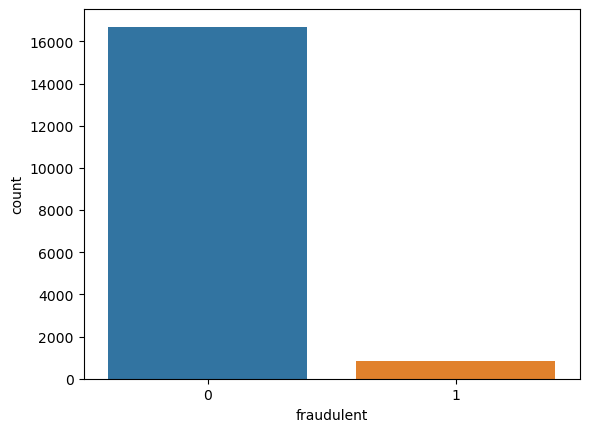

In [90]:
sns.countplot(x='fraudulent',data=data1)  
plt.show()

- Dataset is highly unbalanced with 16701 (95%of jobs) being real and only 840 (5%of jobs) being fake.

In [91]:
data1[data1['fraudulent']==0].duplicated().sum()

11548

In [92]:
data1[data1['fraudulent']==1].duplicated().sum()

524

### Splitting Independent and Dependent Features

In [93]:
x=data1.drop('fraudulent',axis=1)

In [94]:
y=data1['fraudulent']

In [95]:
# Print the shapes of X & Y
print(x.shape)
print(y.shape)

(17541, 73)
(17541,)


In [96]:
y.value_counts()                     

0    16701
1      840
Name: fraudulent, dtype: int64

In [97]:
y.value_counts(normalize=True)       # if data is unbalanced upto 95=5 or 90-10 then use stratify

0    0.952112
1    0.047888
Name: fraudulent, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123, stratify=y)

In [99]:
y_train.value_counts()

0    12525
1      630
Name: fraudulent, dtype: int64

In [100]:
y_train.value_counts(normalize=True)  

0    0.952109
1    0.047891
Name: fraudulent, dtype: float64

In [101]:
y_test.value_counts()

0    4176
1     210
Name: fraudulent, dtype: int64

In [102]:
x_train.head()

,telecommuting,has_company_logo,has_questions,employment_type_Full_time,employment_type_Not_Specified,employment_type_Other,employment_type_Part_time,employment_type_Temporary,required_experience_Director,required_experience_Entry_level,...,function_Management,function_Marketing,function_Not_Specified,function_Other,function_Product_Management,function_Production,function_Project_Management,function_Quality_Assurance,function_Sales,function_Writing_Editing
11600,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10695,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7330,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4228,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4726,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Balancing dataset

#### SMOTE

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
smt=SMOTE()
x_train_smo,y_train_smo = smt.fit_resample(x_train,y_train)

In [105]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_smo)))

Original dataset shape Counter({0: 12525, 1: 630})
Resampled dataset shape Counter({0: 12525, 1: 12525})


In [106]:
x_test.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type_Full_time', 'employment_type_Not_Specified',
       'employment_type_Other', 'employment_type_Part_time',
       'employment_type_Temporary', 'required_experience_Director',
       'required_experience_Entry_level', 'required_experience_Executive',
       'required_experience_Internship',
       'required_experience_Mid_Senior_level',
       'required_experience_Not_Applicable',
       'required_education_Bachelor_s_Degree',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High_School_or_equivalent',
       'required_education_Master_s_Degree', 'required_education_Professional',
       'required_education_Some_College_Coursework_Completed',
       'required_education_Some_High_School_Coursework',
       'required_education_Unspecified', 'required_education_Vocational',
       'required_education_Vocational___Degree',
       'required_education_Vocati

#### SMOTE Tomek

In [107]:
# from imblearn.combine import SMOTETomek
# #from imblearn.under_sampling import NearMiss

In [108]:
# # Implementing Oversampling for Handling Imbalanced 
# smk = SMOTETomek(random_state=42)
# x_train_sm,y_train_sm = smk.fit_resample(x_train,y_train)

In [109]:
# x_train_sm.shape,y_train_sm.shape

In [110]:
# from collections import Counter
# print('Original dataset shape {}'.format(Counter(y_train)))
# print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

#### Random oversampling

In [111]:
# ## RandomOverSampler to handle imbalanced data
# from imblearn.over_sampling import RandomOverSampler

In [112]:
# os =  RandomOverSampler()

In [113]:
# x_train_ros, y_train_ros = os.fit_resample(x_train,y_train)

In [114]:
# from collections import Counter
# print('Original dataset shape {}'.format(Counter(y_train)))
# print('Resampled dataset shape {}'.format(Counter(y_train_ros)))

# Model Building and Evaluation

## 1. Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train_smo,y_train_smo)
y_pred=lr_model.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [116]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

In [117]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.8221614227086184


In [118]:
precision_score(y_test,y_pred)

0.1804932735426009

In [119]:
recall_score(y_test,y_pred)

0.7666666666666667

In [120]:
f1_score(y_test,y_pred)

0.29219600725952816

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4176
           1       0.18      0.77      0.29       210

    accuracy                           0.82      4386
   macro avg       0.58      0.80      0.60      4386
weighted avg       0.95      0.82      0.87      4386



In [122]:
confusion_matrix(y_test,y_pred)

array([[3445,  731],
       [  49,  161]], dtype=int64)

In [123]:
y_test.shape

(4386,)

In [124]:
y_test.value_counts()    #positive class 0:3357    and negative class 1:152

0    4176
1     210
Name: fraudulent, dtype: int64

In [125]:
lr_model.score(x_test, y_test)

0.8221614227086184

## KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
lst_acc=[]
for i in range(5,16,2):    # 2 inside means takes values 5,7,9,.....
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_smo,y_train_smo)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    lst_acc.append(acc)

In [128]:
lst_acc

[0.883264933880529,
 0.8789329685362517,
 0.8711810305517556,
 0.8650250797993616,
 0.8604651162790697,
 0.8575011399908801]

In [129]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(x_train_smo,y_train_smo)
y_pred=knn_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.883264933880529


In [130]:
precision_score(y_test, y_pred)

0.26697530864197533

In [131]:
recall_score(y_test, y_pred)

0.8238095238095238

In [132]:
f1_score(y_test,y_pred)

0.4032634032634033

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4176
           1       0.27      0.82      0.40       210

    accuracy                           0.88      4386
   macro avg       0.63      0.86      0.67      4386
weighted avg       0.96      0.88      0.91      4386



In [134]:
knn_model.score(x_test, y_test)

0.883264933880529

## SVC

In [135]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') 
svc_model=svc.fit(x_train_smo,y_train_smo)
y_pred = svc_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.8173734610123119


In [136]:
precision_score(y_test,y_pred)

0.17984832069339113

In [137]:
recall_score(y_test,y_pred)

0.7904761904761904

In [138]:
f1_score(y_test,y_pred)

0.29302736098852605

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4176
           1       0.18      0.79      0.29       210

    accuracy                           0.82      4386
   macro avg       0.58      0.80      0.59      4386
weighted avg       0.95      0.82      0.87      4386



In [140]:
svc_model.score(x_test, y_test)

0.8173734610123119

## Desicion Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train_smo,y_train_smo)
y_pred=dt_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9163246694026448


In [142]:
precision_score(y_test,y_pred)

0.3333333333333333

In [143]:
recall_score(y_test,y_pred)

0.7476190476190476

In [144]:
f1_score(y_test,y_pred)

0.4610866372980911

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4176
           1       0.33      0.75      0.46       210

    accuracy                           0.92      4386
   macro avg       0.66      0.84      0.71      4386
weighted avg       0.96      0.92      0.93      4386



In [146]:
dt_model.score(x_test, y_test)

0.9163246694026448

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(x_train_smo,y_train_smo)
y_pred=dt_model.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.7546739626082991


## Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train_smo,y_train_smo)
y_pred=rf_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9222526219790241


In [149]:
precision_score(y_test,y_pred)

0.3534675615212528

In [150]:
recall_score(y_test,y_pred)

0.7523809523809524

In [151]:
f1_score(y_test,y_pred)

0.4809741248097413

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4176
           1       0.35      0.75      0.48       210

    accuracy                           0.92      4386
   macro avg       0.67      0.84      0.72      4386
weighted avg       0.96      0.92      0.94      4386



In [153]:
rf_model.score(x_test, y_test)

0.9222526219790241

## CatBoost

In [154]:
import catboost as ctb
 
# fit a CART model to the data
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model = ctb.CatBoostClassifier(silent=True)
model.fit(x_train_smo, y_train_smo)

# make predictions
y_pred = model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9227086183310533


In [155]:
# summarize the fit of the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4176
           1       0.36      0.76      0.49       210

    accuracy                           0.92      4386
   macro avg       0.67      0.85      0.72      4386
weighted avg       0.96      0.92      0.94      4386



In [156]:
print(confusion_matrix(y_test,y_pred))

[[3887  289]
 [  50  160]]


In [157]:
#Concatenating oversampled train data with test data for cross validation
X=np.concatenate((x_train_smo,x_test))
Y=np.concatenate((y_train_smo,y_test))

# Cross Validation

#### KFold 

In [159]:
from sklearn.model_selection import KFold

In [160]:
kfold_validator = KFold(10)

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
#lr
cv_result = cross_val_score(lr_model, X, Y, cv=kfold_validator)
cv_result

array([0.84816576, 0.86413043, 0.85360054, 0.86447011, 0.86243207,
       0.83389946, 0.83893986, 0.83690112, 0.86544343, 0.85219164])

In [163]:
np.mean(cv_result)

0.852017441441741

In [164]:
#knn
cv_result = cross_val_score(knn_model, X, Y, cv=kfold_validator)
cv_result

array([0.88485054, 0.88858696, 0.89096467, 0.86243207, 0.91372283,
       0.94701087, 0.93781855, 0.93170234, 0.91505267, 0.79884472])

In [165]:
np.mean(cv_result)

0.8970986215448595

In [166]:
#svc
cv_result = cross_val_score(svc_model, X, Y, cv=kfold_validator)
cv_result

array([0.81963315, 0.8345788 , 0.82914402, 0.8294837 , 0.85869565,
       0.83661685, 0.85524975, 0.85796806, 0.85830785, 0.82602786])

In [167]:
np.mean(cv_result)

0.8405705690732616

In [168]:
#dt
cv_result = cross_val_score(dt_model, X, Y, cv=kfold_validator)
cv_result

array([0.83322011, 0.84544837, 0.83933424, 0.83967391, 0.79789402,
       0.73675272, 0.74549779, 0.73938158, 0.80801903, 0.83622154])

In [169]:
np.mean(cv_result)

0.8021443315198924

In [170]:
#rf
cv_result = cross_val_score(rf_model, X, Y, cv=kfold_validator)
cv_result

array([0.91779891, 0.93444293, 0.92493207, 0.9296875 , 0.92798913,
       0.92798913, 0.93034319, 0.92796466, 0.92796466, 0.9235474 ])

In [171]:
np.mean(cv_result)

0.9272659585567817

#### StratifiedKFold

In [172]:
from sklearn.model_selection import StratifiedKFold

In [173]:
skfold_validator = StratifiedKFold(n_splits=10)

In [174]:
#lr
skcv_result = cross_val_score(lr_model, X, Y, cv=skfold_validator)
skcv_result

array([0.8372962 , 0.87432065, 0.87737772, 0.8658288 , 0.86039402,
       0.8685462 , 0.87631668, 0.87291879, 0.872579  , 0.85558953])

In [175]:
np.mean(skcv_result)

0.8661167596470623

In [176]:
#knn
skcv_result = cross_val_score(knn_model, X, Y, cv=skfold_validator)
skcv_result

array([0.88451087, 0.91236413, 0.90658967, 0.90930707, 0.9127038 ,
       0.8685462 , 0.8916072 , 0.91267414, 0.90927625, 0.879035  ])

In [177]:
np.mean(skcv_result)

0.8986614331723027

In [180]:
#svc
skcv_result = cross_val_score(svc_model, X, Y, cv=skfold_validator)
skcv_result

array([0.81997283, 0.86379076, 0.85224185, 0.85190217, 0.85258152,
       0.8451087 , 0.85898743, 0.85219164, 0.84743459, 0.83961944])

In [181]:
np.mean(skcv_result)

0.8483830921567759

In [182]:
#dt
skcv_result = cross_val_score(dt_model, X, Y, cv=skfold_validator)
skcv_result

array([0.79789402, 0.80842391, 0.80740489, 0.80264946, 0.80434783,
       0.80095109, 0.81073734, 0.80530071, 0.81073734, 0.80801903])

In [183]:
np.mean(skcv_result)

0.8056465623107153

In [184]:
#rf
skcv_result = cross_val_score(rf_model, X, Y, cv=skfold_validator)
skcv_result

array([0.91066576, 0.93274457, 0.93206522, 0.9361413 , 0.93274457,
       0.93240489, 0.93577982, 0.93476045, 0.93476045, 0.91879035])

In [185]:
np.mean(skcv_result)

0.9300857367888431

### Creating pickle file for Model Deployment

In [186]:
## random forest is the best model

In [187]:
rf1 = RandomForestClassifier()
rf1.fit(X,Y)

RandomForestClassifier()

In [188]:
import pickle

In [189]:
pickle.dump(rf1,open("job_posting.pkl","wb"))

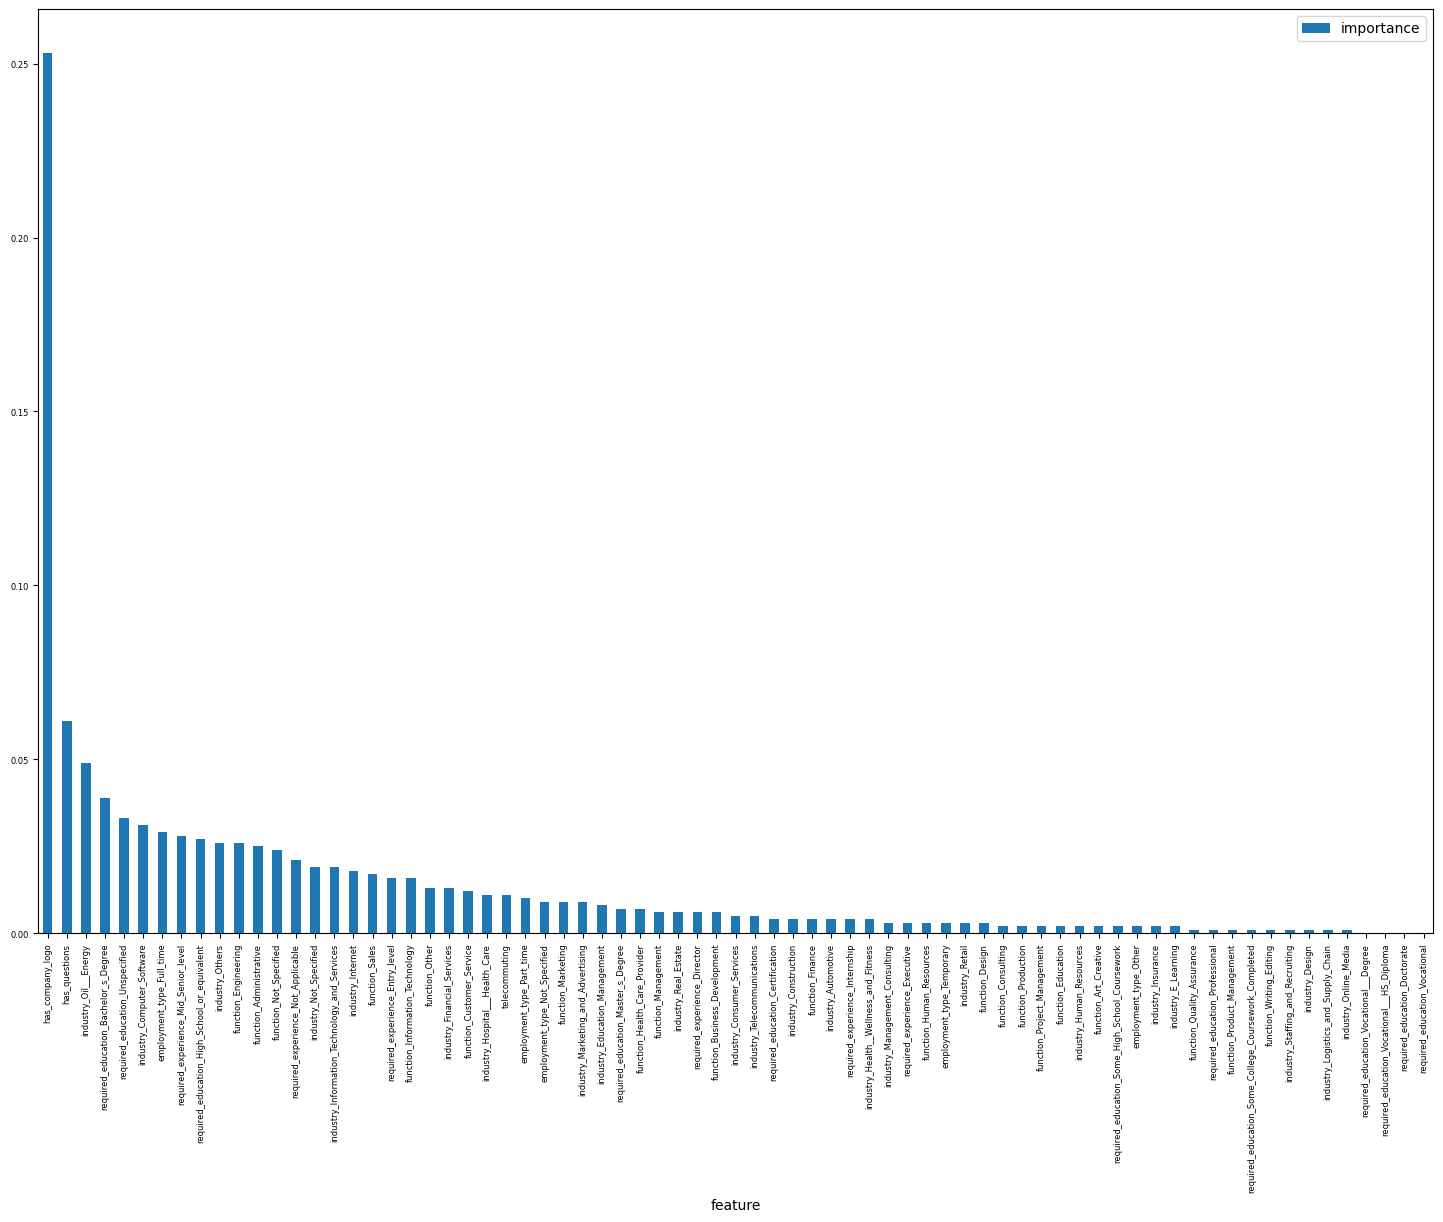

In [190]:
#Most important features are
importances = pd.DataFrame({'feature': x_train.columns, 'importance': np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature', figsize=(18,12),fontsize=6)
plt.show()

In [191]:
rf_model.predict(x.iloc[144:146,:])

array([1, 0], dtype=int64)

In [192]:
rf1.predict(x.iloc[144:146,:])

array([1, 0], dtype=int64)

In [193]:
test=x.iloc[144:146,:]

In [194]:
test.to_csv('test.csv',index = False)

In [195]:
tst=pd.read_csv('C:/Users/Mohan/Downloads/test.csv')
# Loading up the Classification model we created
model = pickle.load(open('C:/Users/Mohan/Downloads/job_posting.pkl','rb'))
model.predict(tst)

array([1, 0], dtype=int64)